## Seaborn
---

In [1]:
# !pip install seaborn

     -------------------------------------- 288.2/288.2 kB 5.9 MB/s eta 0:00:00


In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.__version__

'0.12.1'

In [2]:
sns.load_dataset("penguins")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
df = pd.DataFrame(sns.load_dataset("penguins"))
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
print(df.groupby("island")["species"].value_counts(), "\n\n")   # island별로 어떤 종류가 몇마리가 있는지
print(df.groupby(["island", "species"])["sex"].value_counts())   # island별로 각 종류에 성별이 어떻게 되는지

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: species, dtype: int64 


island     species    sex   
Biscoe     Adelie     Female    22
                      Male      22
           Gentoo     Male      61
                      Female    58
Dream      Adelie     Male      28
                      Female    27
           Chinstrap  Female    34
                      Male      34
Torgersen  Adelie     Female    24
                      Male      23
Name: sex, dtype: int64


#### Axes Level

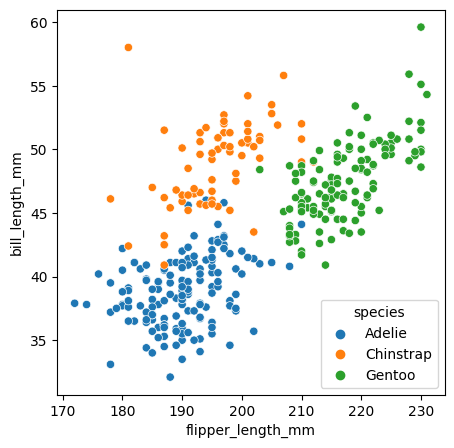

In [19]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

<AxesSubplot: xlabel='species', ylabel='Count'>

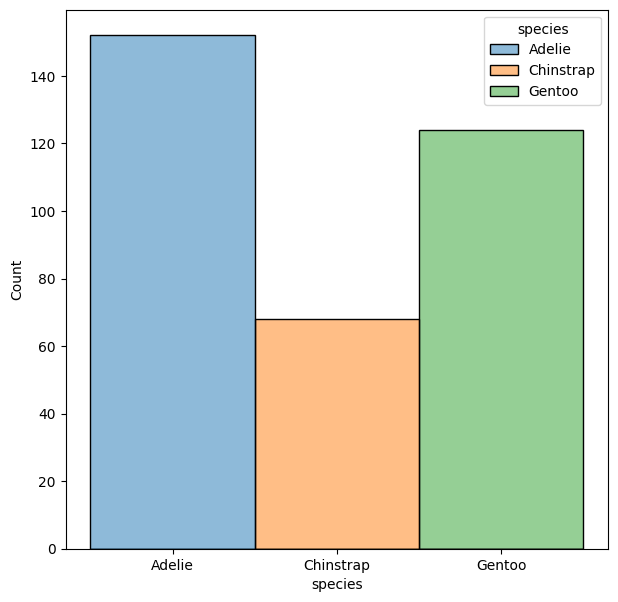

In [24]:
plt.figure(figsize=(7, 7))
sns.histplot(data=df, x="species", hue="species")

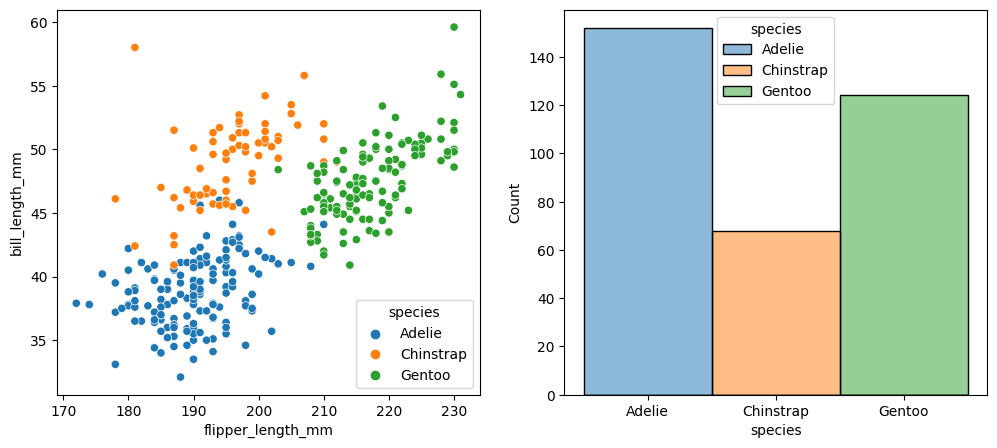

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axes[0])   # 여러개 그릴때는 ax에 지정
sns.histplot(data=df, x="species", hue="species", ax=axes[1])   # 여러개 그릴때는 ax에 지정
plt.show()

#### Figure-Level

In [34]:
print(df.head(), "\n\n")
print(df.columns)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


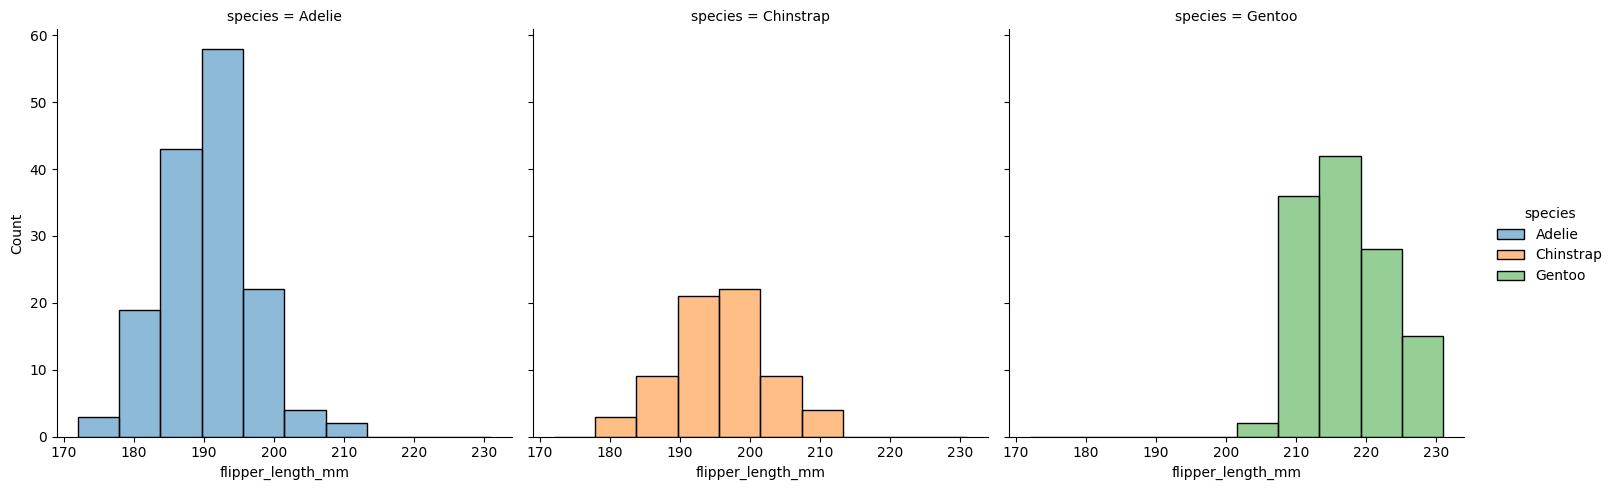

In [38]:
sns.displot(data=df, x="flipper_length_mm", kind="hist", hue="species", col="species")   # y축이 count
plt.show()

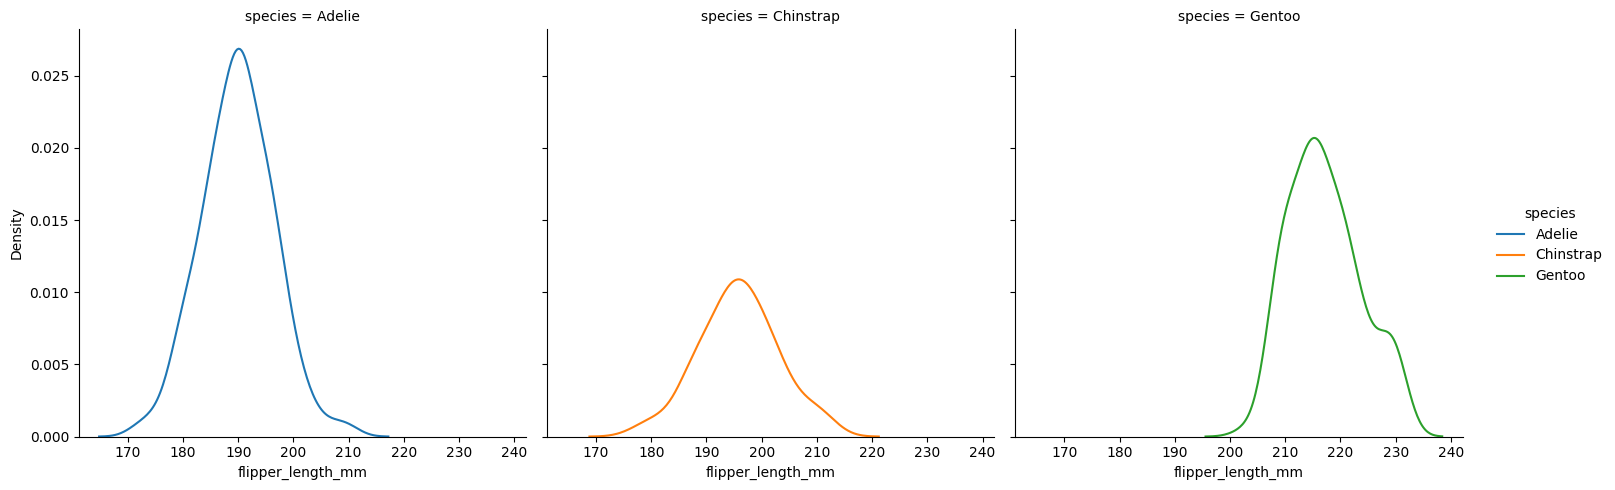

In [40]:
sns.displot(data=df, x="flipper_length_mm", kind="kde", hue="species", col="species")   # y축이 density
plt.show()

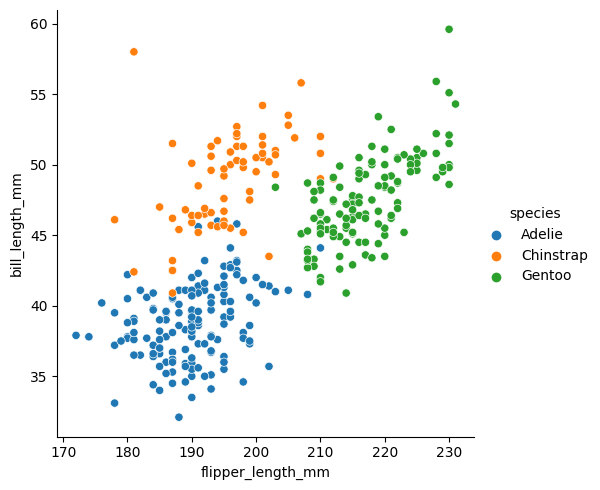

In [50]:
# plt.figure(figsize=(10, 5))   # 크기를 변경하고자 할 때 해당 문법으로 안바뀜
# sns.relplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species", col="species", height=5, aspect=1)   # 크기를 변경하고자 할 때 height랑 aspect로 설정
# sns.relplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species", col="species")
sns.relplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

#### barplot

In [52]:
df = pd.read_csv("data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,lost,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,saved,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,saved,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,saved,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,lost,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,lost,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,saved,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,lost,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,saved,1st,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


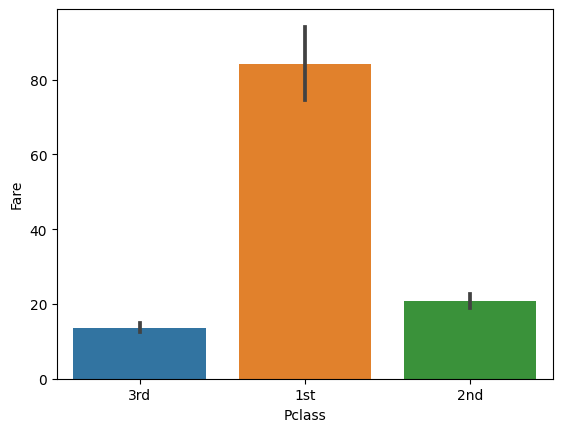

In [54]:
sns.barplot(data=df, x="Pclass", y="Fare")   # 등급별 요금의 평균을 출력, 검은색선은 신뢰구간을 의미
plt.show()

<AxesSubplot: xlabel='Pclass', ylabel='count'>

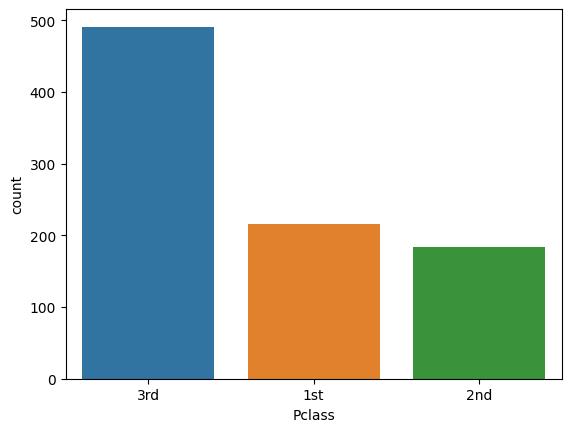

In [55]:
sns.countplot(data=df, x="Pclass")   # 등급별 개수 확인
plt.show()

In [56]:
df["Pclass"].value_counts()

3rd    491
1st    216
2nd    184
Name: Pclass, dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

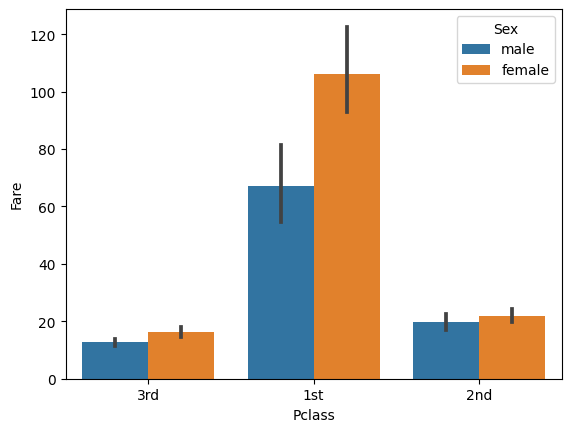

In [57]:
sns.barplot(data=df, x="Pclass", y="Fare", hue="Sex")

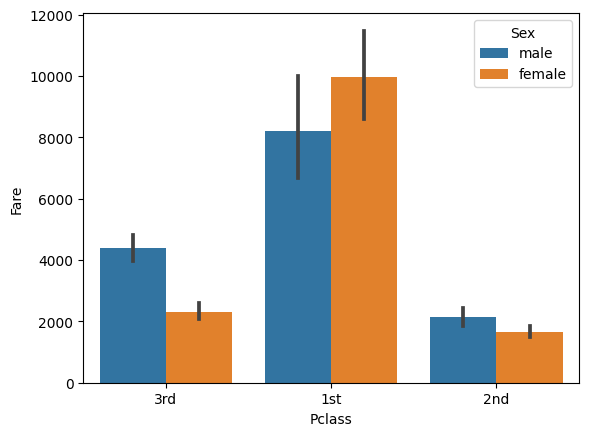

In [65]:
import numpy as np
sns.barplot(data=df, x="Pclass", y="Fare", hue="Sex", estimator=np.sum)
plt.show()

#### boxplot

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

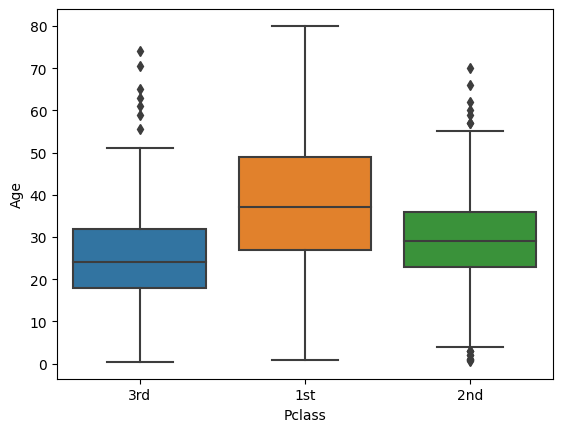

In [64]:
sns.boxplot(data=df, x="Pclass", y="Age")

#### violinplot

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

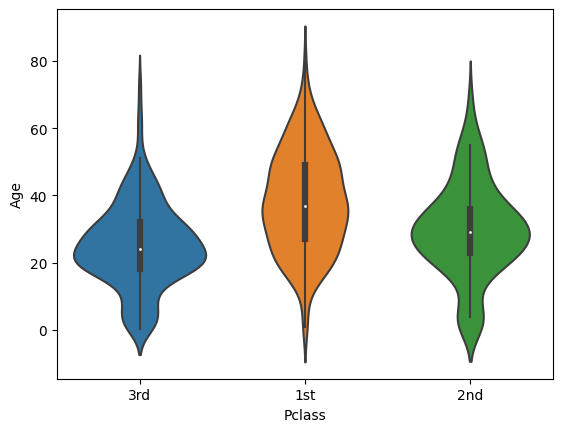

In [66]:
sns.violinplot(data=df, x="Pclass", y="Age")

#### heatmap

In [67]:
data = np.random.rand(3, 3)
data

array([[0.40983326, 0.02926569, 0.59222935],
       [0.64274834, 0.36585874, 0.82749748],
       [0.58687303, 0.71599869, 0.11588561]])

<AxesSubplot: >

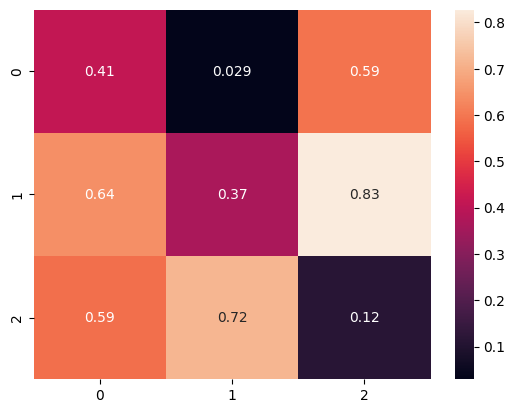

In [75]:
sns.heatmap(data, annot=True)

<AxesSubplot: >

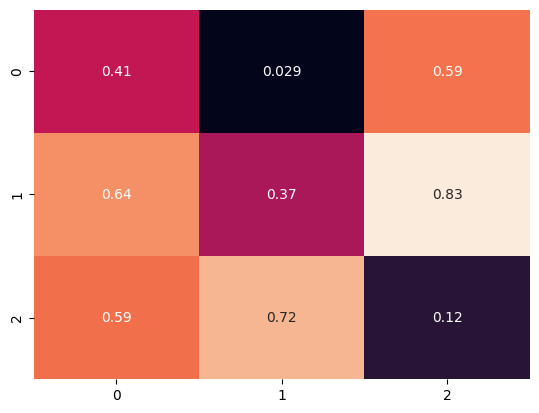

In [76]:
sns.heatmap(data, annot=True, cbar=False)

<AxesSubplot: >

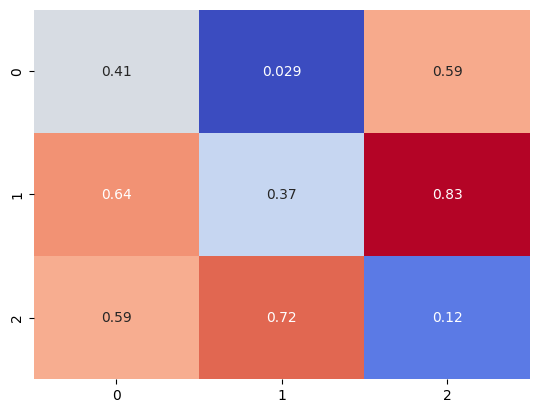

In [77]:
sns.heatmap(data, annot=True, cbar=False, cmap="coolwarm")

#### pairplot

In [79]:
df = pd.read_csv("data/iris.csv", index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


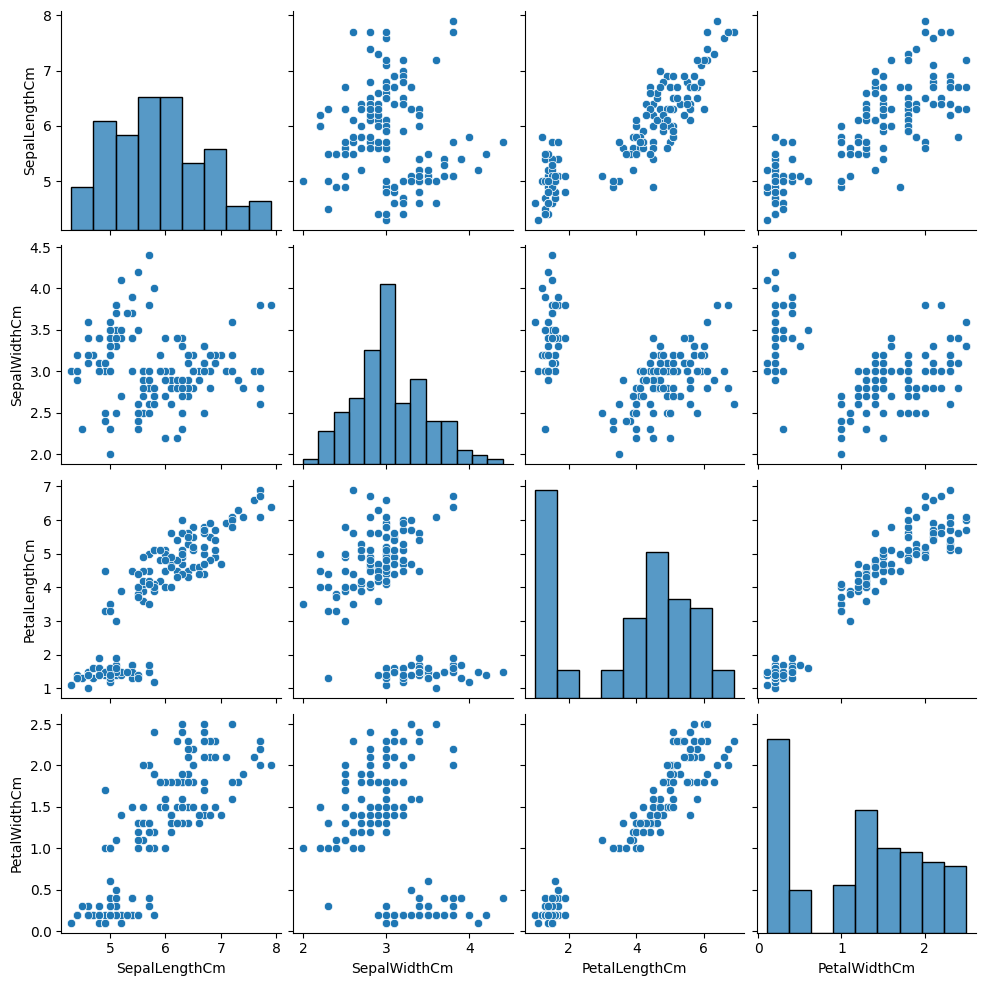

In [80]:
sns.pairplot(df)
plt.show()

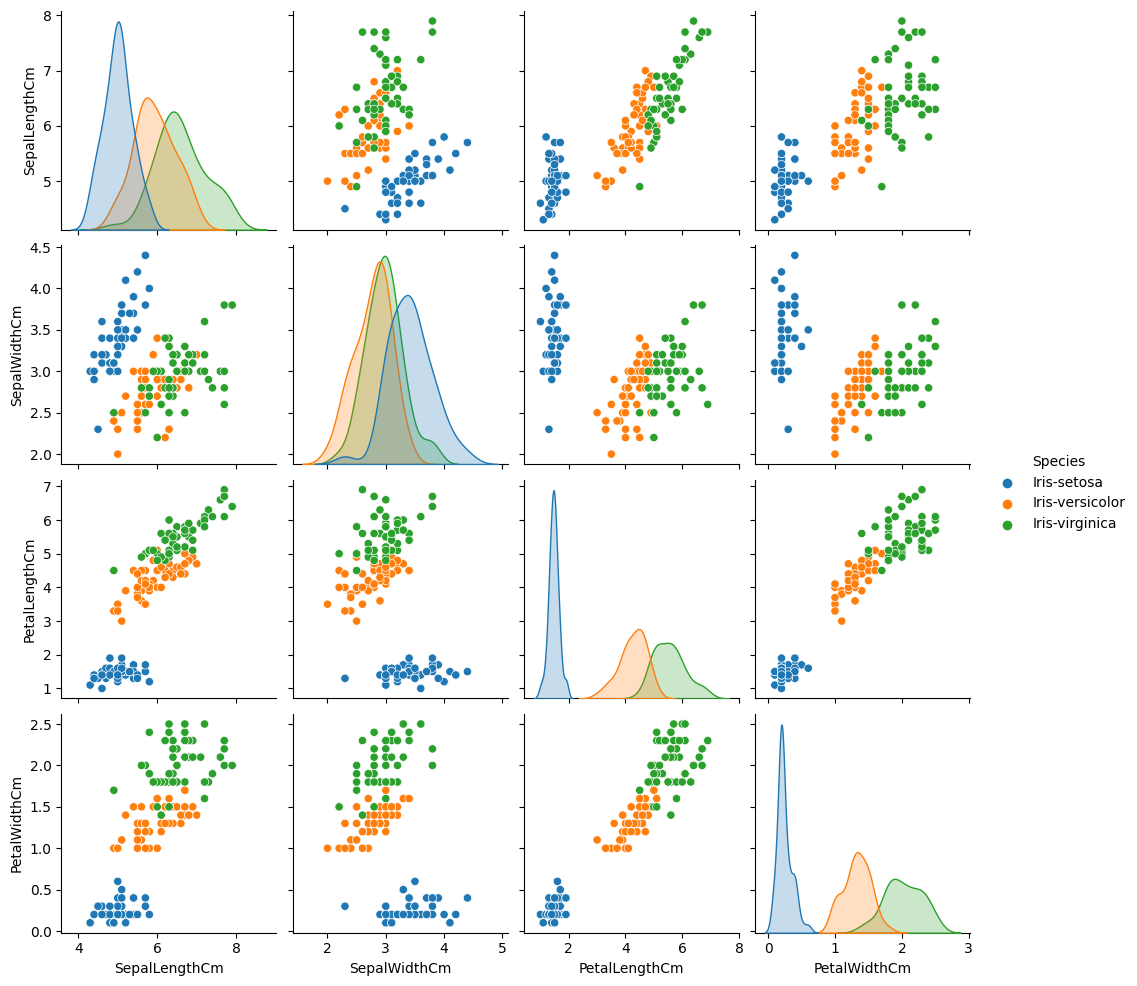

In [82]:
sns.pairplot(df, hue="Species")
plt.show()

In [83]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/tips.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/tips.csv
To: C:\workspace\flyai\tips.csv

  0%|          | 0.00/1.80k [00:00<?, ?B/s]
9.97kB [00:00, 912kB/s]                    


In [85]:
df = pd.read_csv("data/tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [87]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot: xlabel='day', ylabel='tip'>

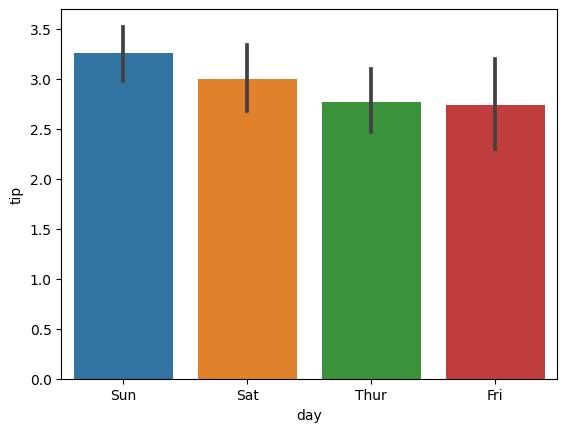

In [89]:
sns.barplot(data=df, x="day", y="tip")

<AxesSubplot: xlabel='sex', ylabel='tip'>

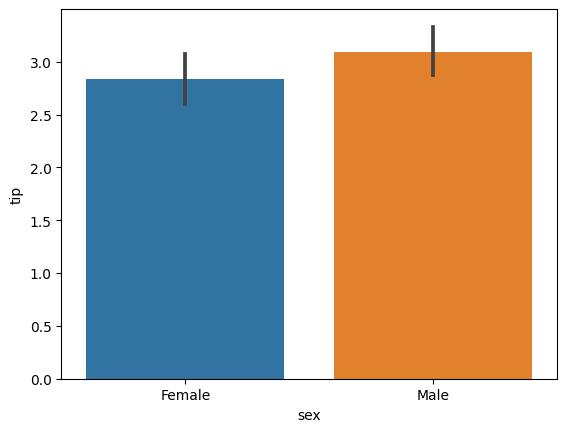

In [90]:
sns.barplot(data=df, x="sex", y="tip")

<AxesSubplot: xlabel='smoker', ylabel='tip'>

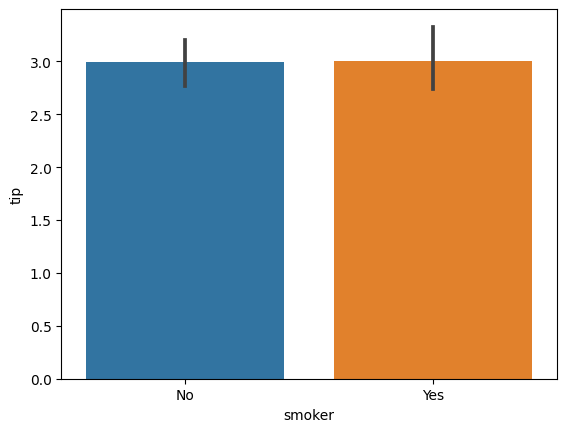

In [91]:
sns.barplot(data=df, x="smoker", y="tip")

<AxesSubplot: xlabel='time', ylabel='tip'>

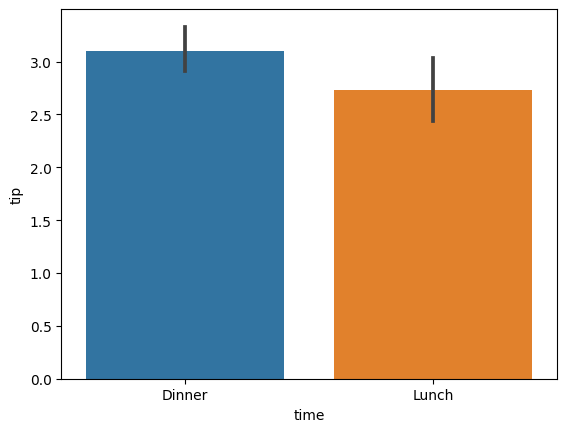

In [92]:
sns.barplot(data=df, x="time", y="tip")